In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv(r"C:\Users\Admin\Downloads\playground-series-s4e6\train.csv")
test=pd.read_csv(r"C:\Users\Admin\Downloads\playground-series-s4e6\test.csv")

In [3]:
train.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

In [5]:
train.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                 

In [7]:
# List of numerical columns
numerical_cols = ['Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)',
                  'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                  'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
                  'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
                  'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                  'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
                  'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [8]:
from scipy import stats
# Calculate Z-scores
z_scores = np.abs(stats.zscore(train[numerical_cols]))

# Identify outliers
outliers = np.where(z_scores > 3)

# Display the indices of outliers
print("Outliers detected at indices:", outliers)


Outliers detected at indices: (array([    5,     5,    16, ..., 76505, 76514, 76515], dtype=int64), array([3, 9, 3, ..., 7, 4, 7], dtype=int64))


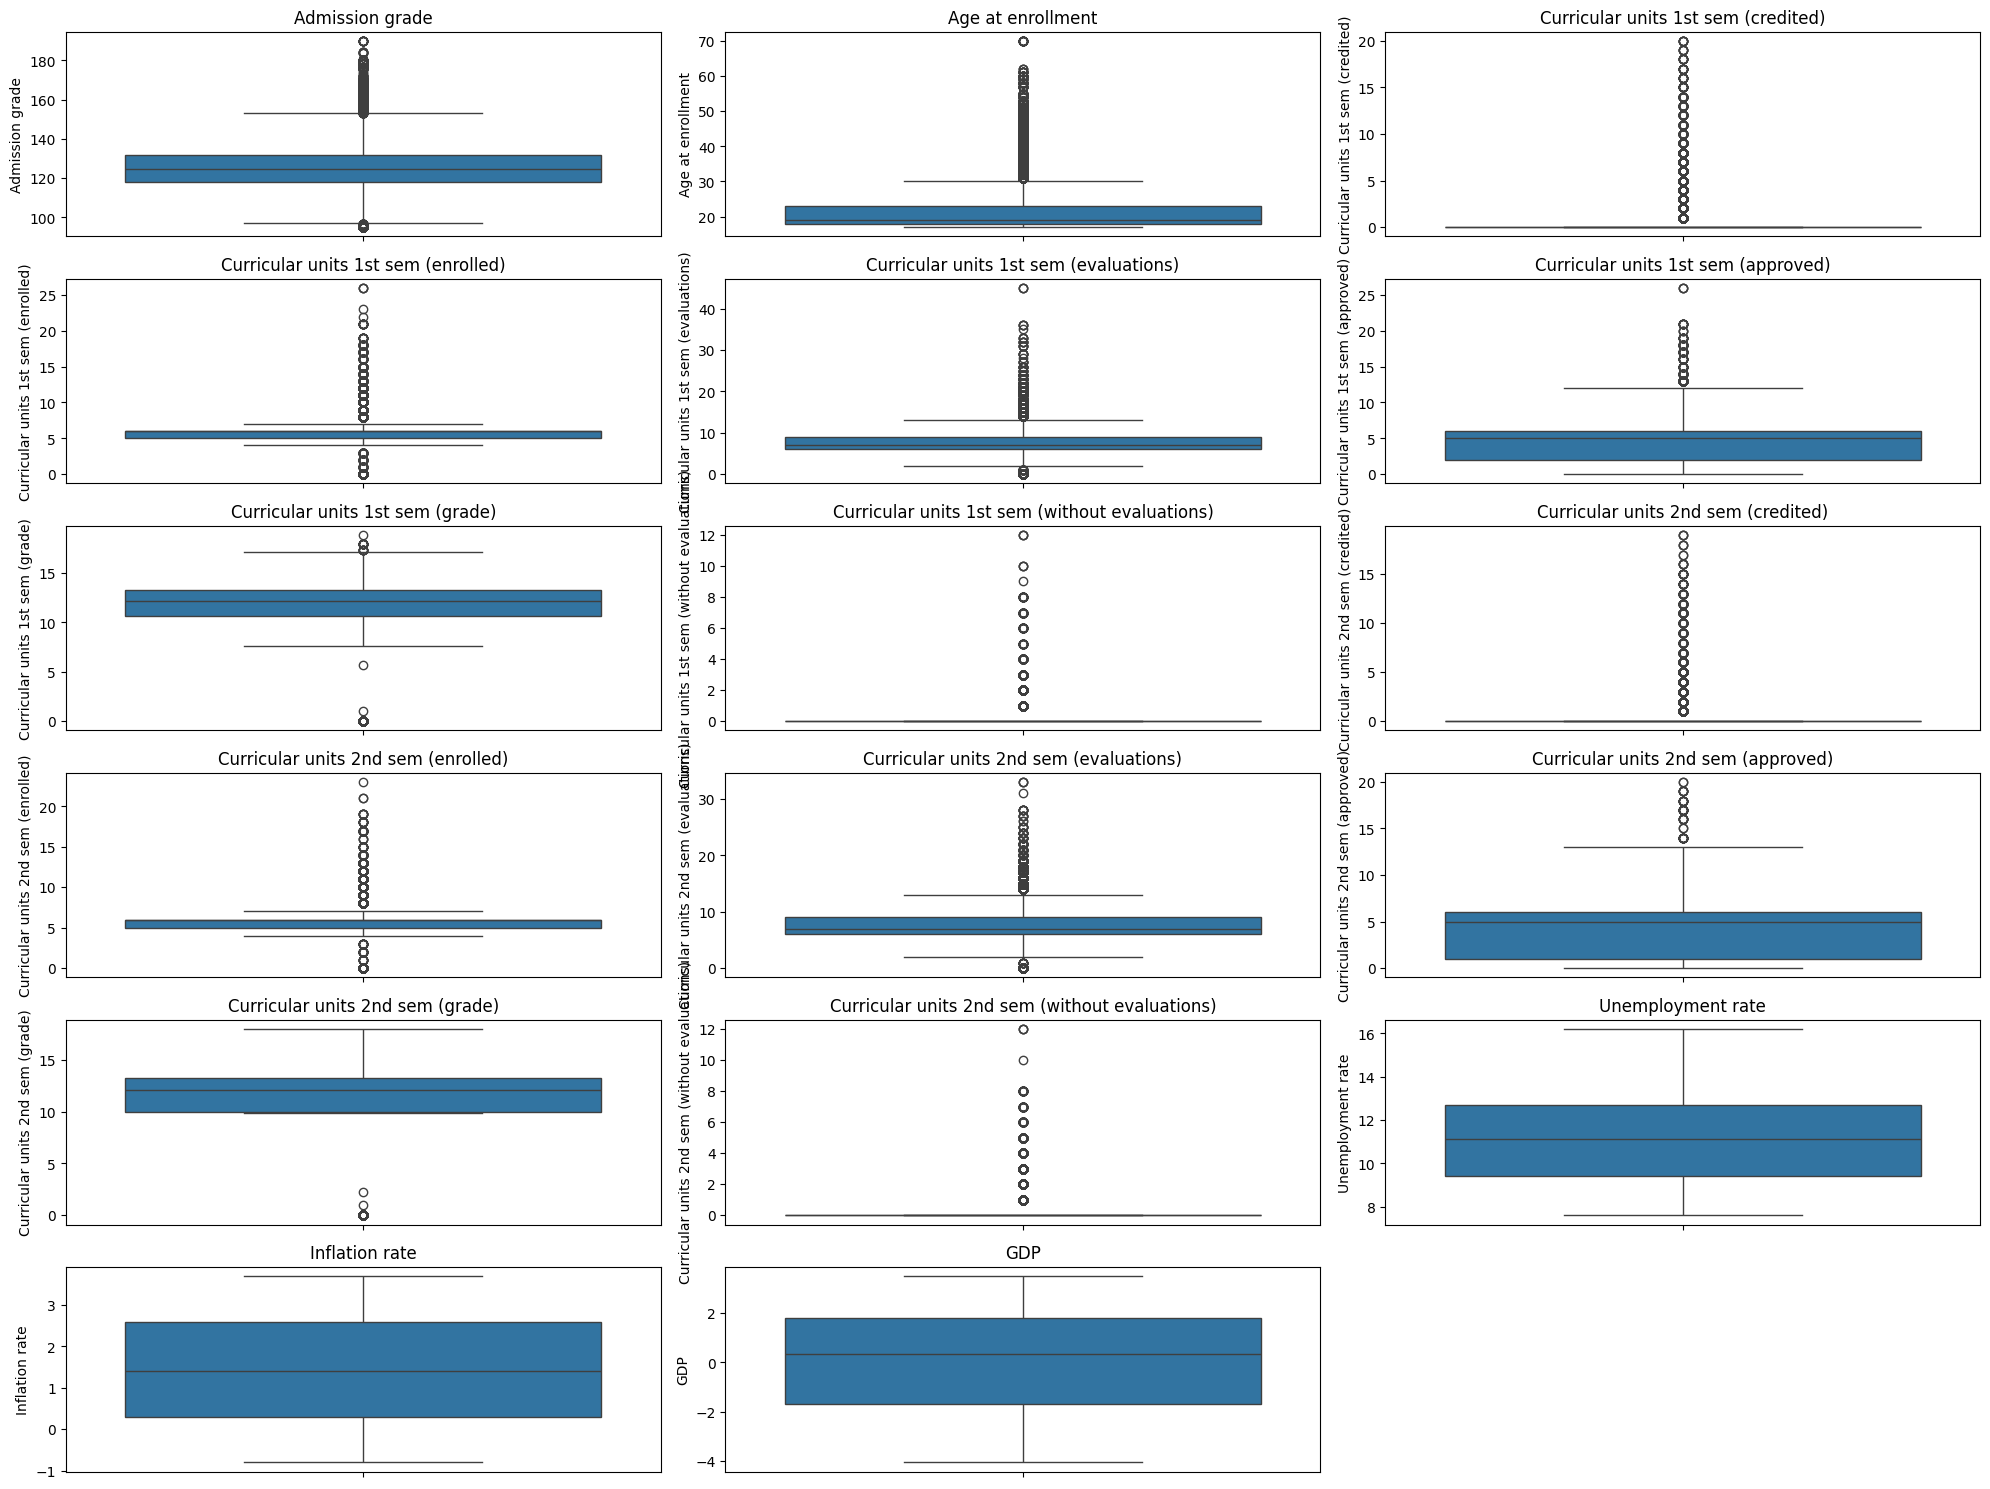

In [9]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):    #Visualize outliers
    plt.subplot(6, 3, i)
    sns.boxplot(y=train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [10]:
outlier_indices = list(set(outliers[0]))

# Display the number of outliers detected
print(f"Number of outliers detected: {len(outlier_indices)}")
train_cleaned = train.drop(index=outlier_indices)

# Check the shape of the cleaned data
print(f"Shape of training data before removing outliers: {train.shape}")
print(f"Shape of training data after removing outliers: {train_cleaned.shape}")

Number of outliers detected: 9007
Shape of training data before removing outliers: (76518, 37)
Shape of training data after removing outliers: (67511, 37)


In [11]:
#scaling
train=train_cleaned
train.shape

(67511, 37)

In [12]:
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test.fillna(train.max(), inplace=True)

In [31]:
X_test=test.copy()

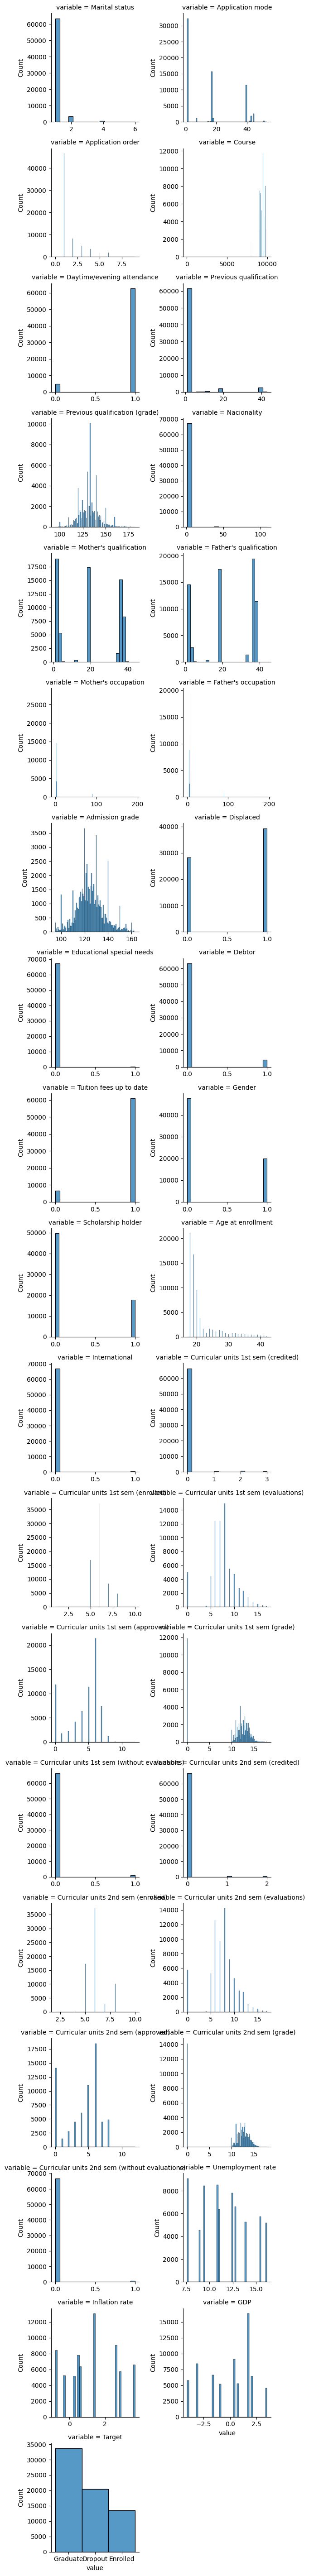

In [13]:
p=sns.FacetGrid(train.melt(),col='variable',col_wrap=2,sharex=False,sharey=False)
p.map(sns.histplot,"value")
plt.show()

In [14]:
# Sum up the curricular units for 1st and 2nd semesters
for col in ['credited', 'enrolled', 'evaluations', 'approved', 'grade', 'without evaluations']:
    train[f'Curricular units total {col}'] = train[f'Curricular units 1st sem ({col})'] + train[f'Curricular units 2nd sem ({col})']
    test[f'Curricular units total {col}'] = test[f'Curricular units 1st sem ({col})'] + test[f'Curricular units 2nd sem ({col})']

# Drop the original curricular units columns
cols_to_drop = [f'Curricular units 1st sem ({col})' for col in ['credited', 'enrolled', 'evaluations', 'approved', 'grade', 'without evaluations']] + \
               [f'Curricular units 2nd sem ({col})' for col in ['credited', 'enrolled', 'evaluations', 'approved', 'grade', 'without evaluations']]
train = train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)


In [15]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
num_cols = ['Admission grade', 'Age at enrollment', 'Curricular units total credited', 'Curricular units total enrolled',
            'Curricular units total evaluations', 'Curricular units total approved', 'Curricular units total grade',
            'Curricular units total without evaluations', 'Unemployment rate', 'Inflation rate', 'GDP']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
train[num_cols] = scaler.fit_transform(train[num_cols])

# Transform the test data
test[num_cols] = scaler.transform(test[num_cols])


In [16]:
from sklearn.model_selection import train_test_split

# Define the target column
target_column = 'Target'  # replace 'target' with your actual target column name

# Extract features and target
X = train.drop(columns=[target_column])
y = train[target_column]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to ensure they are consistent
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_val: {X_val.shape}')
print(f'Shape of y_val: {y_val.shape}')


Shape of X_train: (54008, 30)
Shape of y_train: (54008,)
Shape of X_val: (13503, 30)
Shape of y_val: (13503,)


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
mod_rf=rf.fit(X_train,y_train)

In [18]:
rf_pred=mod_rf.predict(X_val)

In [19]:
from sklearn.metrics import accuracy_score
acc_rf=accuracy_score(y_val,rf_pred)
acc_rf

0.8348515144782641

In [20]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
mod_lr=lr.fit(X_train,y_train)
lr_pred=lr.predict(X_val)
acc_lr=accuracy_score(y_val,lr_pred)
print("Acc_rf:",acc_rf)
print("Acc_lr:",acc_lr)

Acc_rf: 0.8348515144782641
Acc_lr: 0.6406724431607791


C:\Users\Admin\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
mod_dc=dc.fit(X_train,y_train)
dc_pred=dc.predict(X_val)
acc_dc=accuracy_score(dc_pred,y_val)
acc_dc

0.7498333703621417

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
mod_nb= GaussianNB()

In [23]:
gnb = mod_nb.fit(X_train,y_train) 
gnb_pred=gnb.predict(X_val)
acc_gnb=accuracy_score(y_val,gnb_pred)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
mod_kn=KNeighborsClassifier()
model_kn=mod_kn.fit(X_train,y_train)
kn_pred=model_kn.predict(X_val)
acc_kn=accuracy_score(y_val,kn_pred)
print(acc_kn)

0.672517218395912


In [25]:
acc_gnb

0.7564985558764719

In [38]:
from sklearn.model_selection import cross_val_score

In [40]:
scores = cross_val_score(rf, X, y, cv=5)

In [41]:
scores

array([0.82914908, 0.83076581, 0.82943268, 0.82906236, 0.82654422])

In [42]:
model = RandomForestClassifier(
    n_estimators=100,          # Number of trees in the forest
    max_depth=None,            # Expand nodes until all leaves are pure or contain less than min_samples_split samples
    min_samples_split=2,       # Minimum number of samples required to split an internal node
    min_samples_leaf=1,        # Minimum number of samples required to be at a leaf node
    max_features='sqrt',       # Number of features to consider when looking for the best split
    bootstrap=True,            # Use bootstrap samples
    oob_score=True,            # Use out-of-bag samples to estimate the generalization accuracy
    n_jobs=-1,                 # Use all processors
    random_state=42            # Control the randomness of the estimator
)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Random Forest accuracy: {accuracy}")

# Out-of-bag score
oob_accuracy = model.oob_score_
print(f"OOB accuracy: {oob_accuracy}")

Random Forest accuracy: 0.8342590535436569
OOB accuracy: 0.8243408383943119


In [26]:
from sklearn.metrics import confusion_matrix,classification_report


Classification Report:


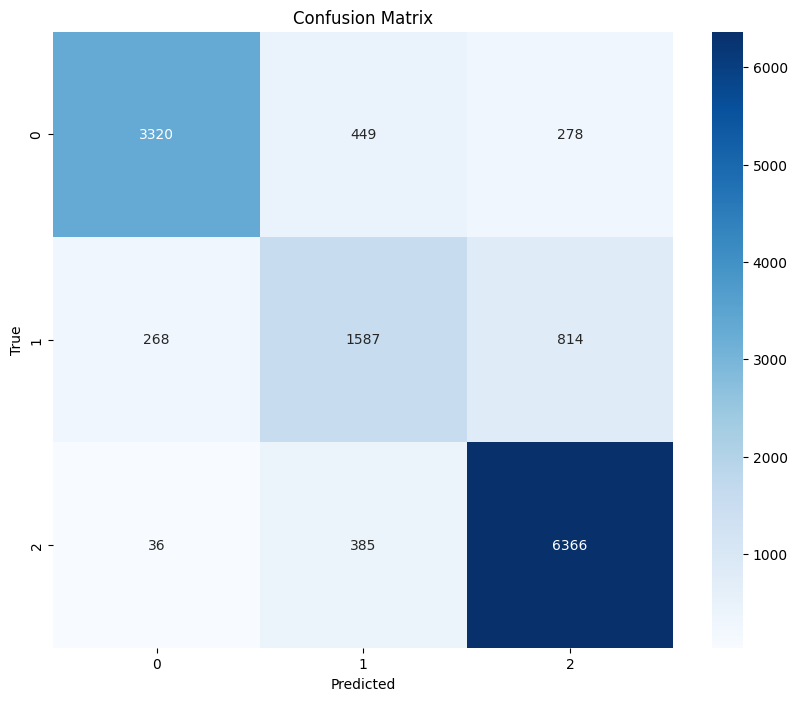

In [46]:
print('\nClassification Report:')
classification_report(y_val,rf_pred)

#Confusion matrix
conf_matrix = confusion_matrix(y_val, rf_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()


In [47]:
rf_pred

array(['Graduate', 'Dropout', 'Graduate', ..., 'Graduate', 'Enrolled',
       'Enrolled'], dtype=object)

In [48]:
rf_pred_test=mod_rf.predict(X_test)

In [34]:
sample=pd.read_csv(r"C:\Users\Admin\Downloads\playground-series-s4e6\sample_submission.csv")

In [35]:
sample.head(10)

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate
5,76523,Graduate
6,76524,Graduate
7,76525,Graduate
8,76526,Graduate
9,76527,Graduate


In [49]:
sample['Target']=rf_pred_test

In [50]:
sample.to_csv("play.csv",index=False)